In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vijayaadithyanvg/car-price-predictionused-cars")

print("Path to dataset files:", path)

100%|██████████| 3.76k/3.76k [00:00<00:00, 707kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vijayaadithyanvg/car-price-predictionused-cars/versions/1


In [ ]:
import os
import pandas as pd

files = os.listdir(path)
files

['car data.csv']

In [ ]:
csv_file = [file for file in files if file.endswith('.csv')]
if csv_file:
    df = pd.read_csv(os.path.join(path, csv_file[0]))
    print("Dataset loaded successfully.")
else:
    print("No CSV file found in the directory.")

Dataset loaded successfully.


In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
x = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [ ]:
categorical_features = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']
numerical_features = ['Year', 'Present_Price', 'Driven_kms', 'Owner']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [ ]:
X_processed = preprocessor.fit_transform(x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error',metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │          14,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,416 (95.38 KB)

 Trainable params: 24,416 (95.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 55.6207 - mae: 4.9136 - val_loss: 44.0822 - val_mae: 4.5971
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 51.4010 - mae: 4.7649 - val_loss: 42.6790 - val_mae: 4.4641
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 51.9994 - mae: 4.6509 - val_loss: 40.4748 - val_mae: 4.2736
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 35.9132 - mae: 3.9414 - val_loss: 37.2906 - val_mae: 4.0348
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 37.8371 - mae: 3.9880 - val_loss: 32.6445 - val_mae: 3.7072
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 28.4878 - mae: 3.4614 - val_loss: 26.7749 - val_mae: 3.2934
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 27.5961 - mae: 3.2350 - val_loss: 20.8354 - val_mae: 2.8575
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 21.3279 - mae: 2.9633 - val_loss: 15.8315 - val_mae: 2.4851
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss

In [ ]:
test_loss , test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6890 - mae: 0.5301 
Test Loss: 0.6012399196624756
Test MAE: 0.5136435031890869


In [ ]:
new_car = pd.DataFrame({
    'Car_Name': ['Toyota Corolla'],
    'Year': [2018],
    'Present_Price': [9.5],
    'Driven_kms': [30000],
    'Fuel_Type': ['Petrol'],
    'Selling_type': ['Dealer'],
    'Transmission': ['Manual'],
    'Owner': [1]
})

# Transform the new car data
new_car_processed = preprocessor.transform(new_car)

# Predict the price
predicted_price = model.predict(new_car_processed)
print(f"Predicted Selling Price for new car: {predicted_price[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Predicted Selling Price for new car: 7.60


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


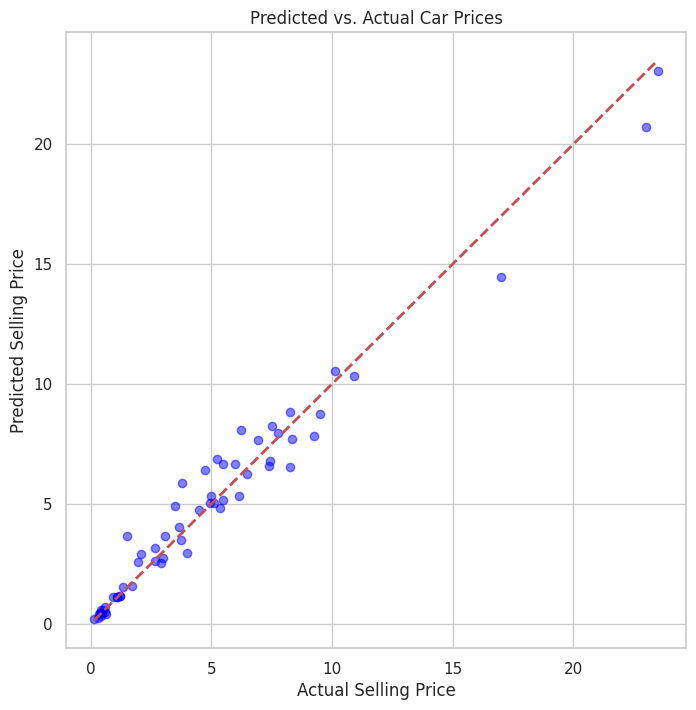

In [ ]:
# Plot Predicted vs Actual
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Predicted vs. Actual Car Prices")
plt.show()


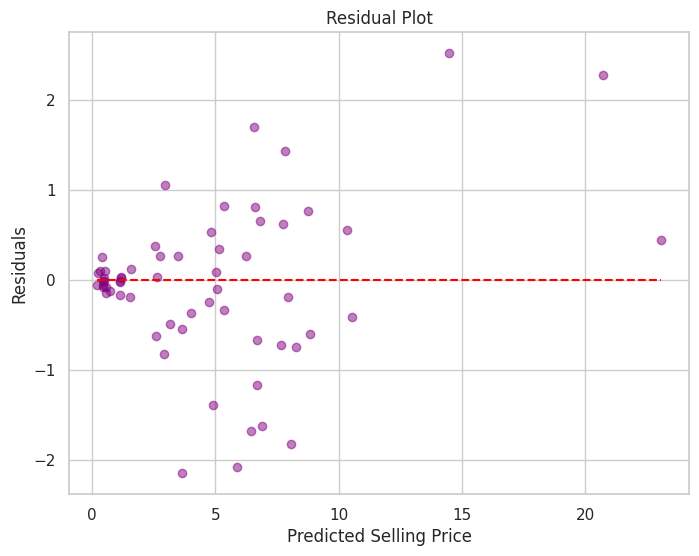

In [ ]:
# Calculate residuals
residuals = y_test - y_pred.flatten()

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red', linestyle='--')
plt.xlabel("Predicted Selling Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


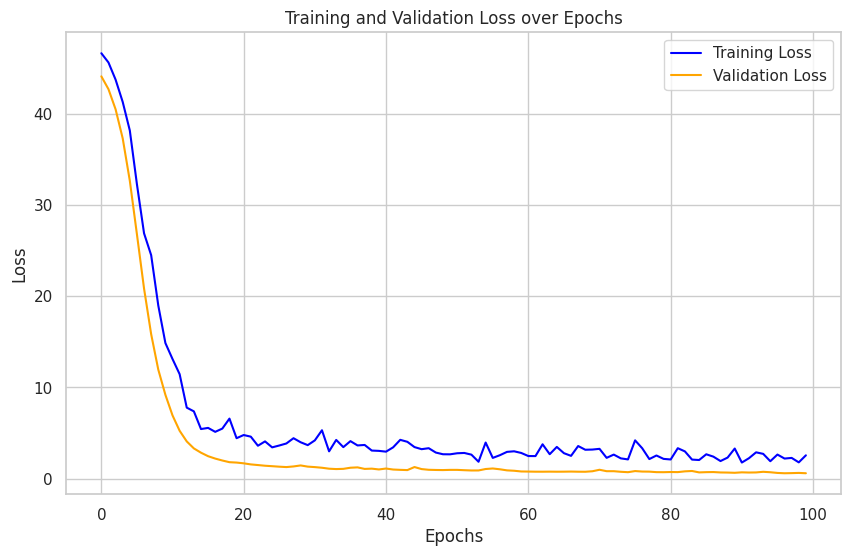

In [ ]:
# Assuming 'history' is the result of model.fit(...)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs")
plt.legend()
plt.show()
